# Dataset:
You have a dataset containing information about customers in a supermarket mall. The dataset includes the following attributes:

Customer ID Age Gender Annual Income Spending Score

# Context
This data set is created only for the learning purpose of the customer concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


# Problem Statement:
Your goal is to perform customer segmentation using the KMeans Clustering algorithm. This involves dividing customers into groups (segments) based on their attributes (age, income, spending score) to gain insights into their behavior. The primary objectives are:

To identify distinct groups of customers based on their characteristics. To determine the target customers who can be easily engaged and marketed to. To understand how marketing strategies can be effective based on the segments identified.

# Inspiration
By the end of this case study , I will be able to answer below questions.
1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2- Who are your target customers with whom you can start marketing strategy [easy to converse]
3- How the marketing strategy works in real world

# Approach:
You will use the KMeans Clustering algorithm, an unsupervised machine learning technique, to cluster customers into different groups. Here's a simplified step-by-step outline of how you might approach this problem using Python:

# Data Loading

In [1]:
# WE IMPORT THE NECESSARY LIBRARIES TO LOAD THE DATASET

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
path=r'C:\Users\user\Desktop\MICHELLE\DATA SCIENCE\Projects practices\mall_customers.csv'
df=pd.read_csv(path)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

# Exploratory Data Analysis (EDA)

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


On this analysis, the average customer's age is 38 years, average Annual Income is 60.56 and Spending Score of 50.2.
Whereas, the maximum age of a customer is 70 years, Income of 137k dollars, and Spending Score of 99.

In [7]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Visualizations

#### What about gender?

Text(0.5, 1.0, 'Distribution of Gender')

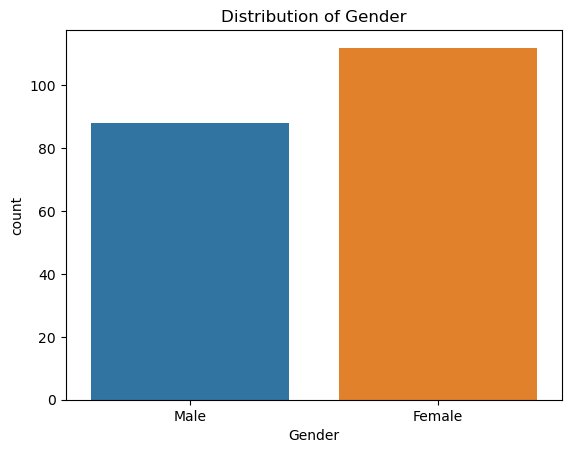

In [12]:
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')

There are slightly more women than men in this dataset. This suggests that more women shop more than men.

####  What about Income?

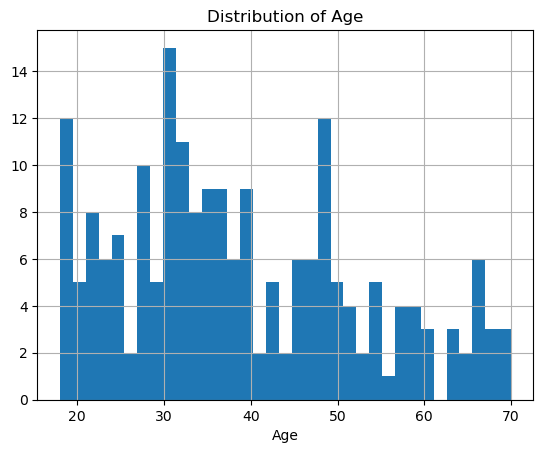

In [14]:
# Create a histogram of ages
df.hist('Age', bins=35)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

The ages are mostly 30 and 40. There are less older customers, so this distribution is right-skewed because of its longer right tail. This could be because of the appeal of malls and the type of demographic that tends to shop there.

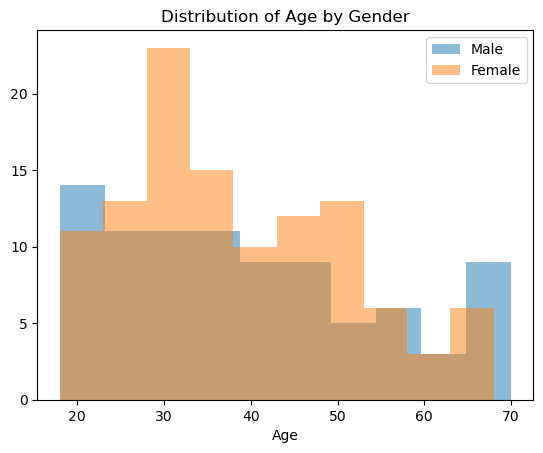

In [17]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()
plt.show()

The men in this data set tended to be younger than the women. You can see the spike around the age of 30–35 for the women is where the majority of them fall. There are also more middle-aged women in this data set than men. There is a significant amount of senior men in the 65–70 year old bucket.

#### What about Income?

Text(0.5, 0, 'Thousands of Dollars')

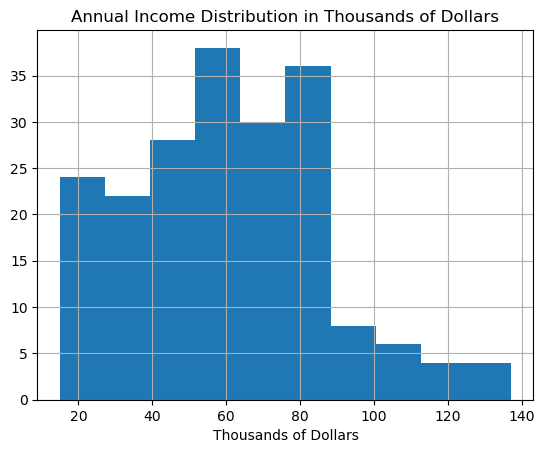

In [19]:
df.hist('Annual Income (k$)')
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

Much of the incomes lie between the 60 and 85,000 dollar buckets. Does gender impact this?

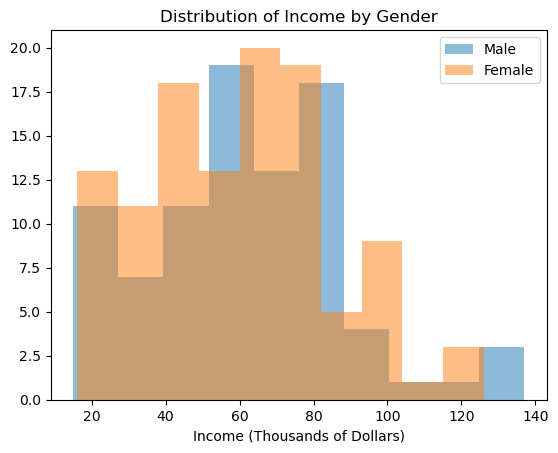

In [21]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Income (Thousands of Dollars)')
plt.legend();

The women in this data set make less money than the men. What does their spending score look like and how does it compare though?

In [23]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


Men had an average spending score of 48.5 and women had an average score of 51.5. Women earned less but spent more at this mall and in this data set.

Text(0.5, 1.0, 'Age to Income, Colored by Gender')

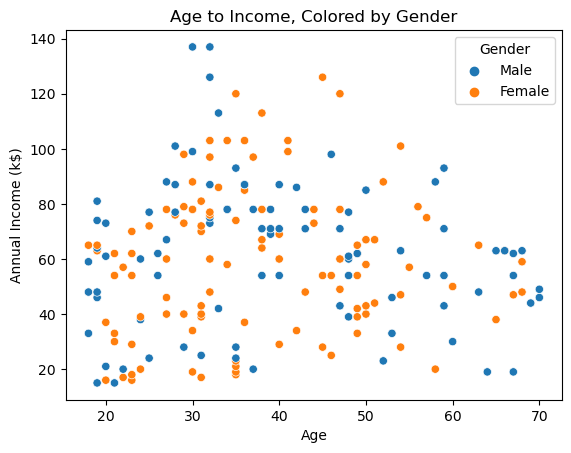

In [26]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df)
plt.title('Age to Income, Colored by Gender')

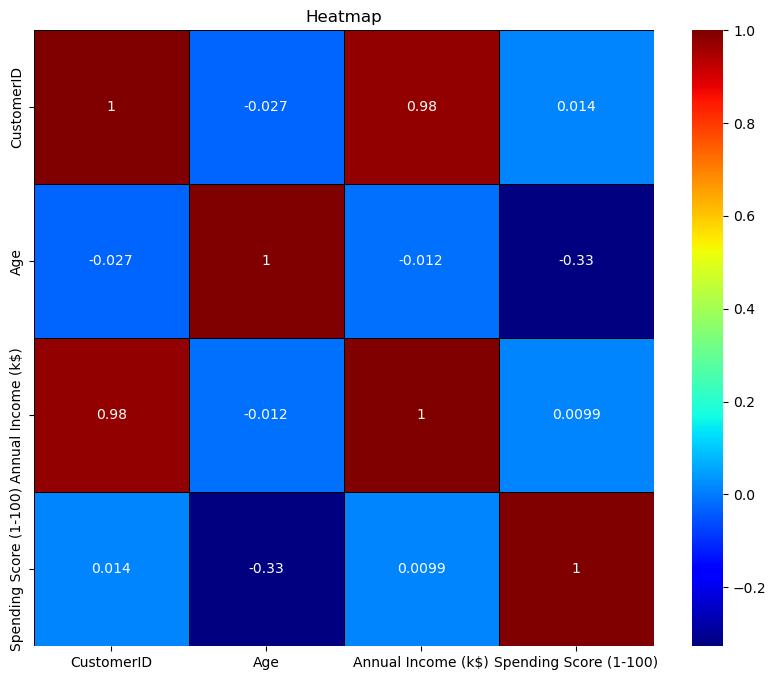

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), linewidth=0.6, annot=True, linecolor='black', cmap='jet')
plt.axis('tight')
plt.title('Heatmap')
plt.show()

You can see from the above plot that the only variables that are even somewhat correlated is spending score and age. It’s a negative correlation so the older a customer is in this data set, the lower their spending score. But because it’s 0.33, it’s not a strong correlation at all. It’s still ever so slightly informative and follows basic logic.

Text(0.5, 1.0, 'Age to Spending Score, Colored by Gender')

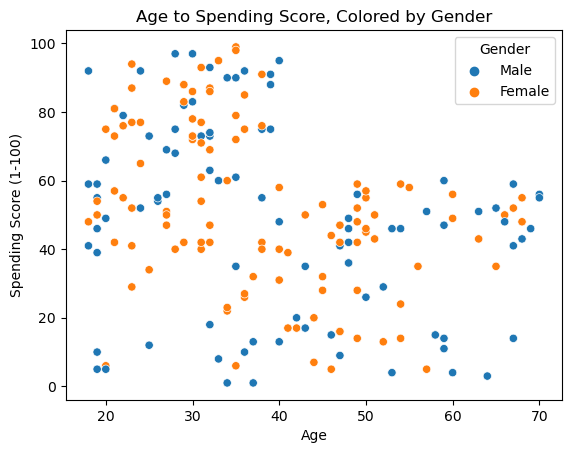

In [28]:
sns.scatterplot(x='Age',y= 'Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age to Spending Score, Colored by Gender')

Text(0.5, 1.0, 'Age to Spending Score')

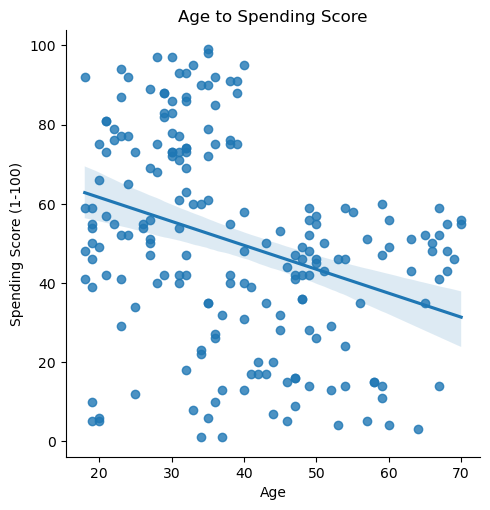

In [30]:
sns.lmplot(x='Age',y= 'Spending Score (1-100)', data=df)
plt.title('Age to Spending Score')

Text(0.5, 1.0, 'Annual Income to Spending Score, Colored by Gender')

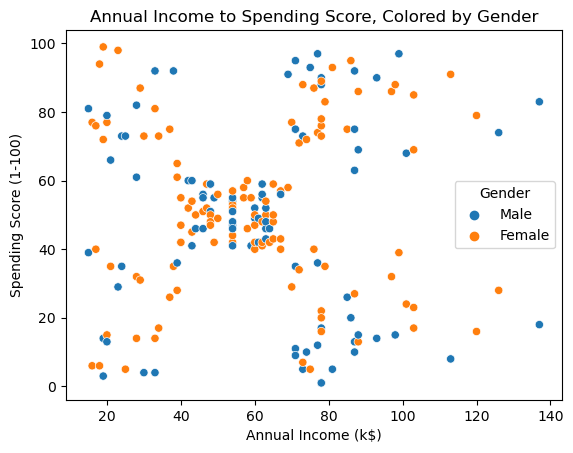

In [32]:
sns.scatterplot(x='Annual Income (k$)',y= 'Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income to Spending Score, Colored by Gender')

There is some patterning here. Zero correlation though. But you can think of these as customer segments:

Low income, low spending score
Low income, high spending score
Mid income, medium spending score
High income, low spending score
High income, high spending score

# Feature Scaling

In [33]:
df=df.drop(['CustomerID'], axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# SCALER TRANSFORM
## Transform the data
Standardise the data using the StandardScaler function from Sklearn. To account for variations in measurements of units and scale, it is common practice.

In [34]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_columns = ['Gender']

# Create transformers for scaling numerical columns and encoding categorical columns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a non-sparse matrix

# Create a column transformer to apply transformations
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_columns),
        ('cat', encoder, categorical_columns)
    ],
    remainder='passthrough'  # Pass through any columns that are not transformed
)

# Apply preprocessing to your feature matrix X\
X = df[numerical_columns + categorical_columns]  
X_scaled = preprocessor.fit_transform(X)
#In this code, the ColumnTransformer is used to apply different transformations to numerical and categorical columns separately. This approach ensures that categorical variables are properly encoded before scaling, avoiding the 'string to float' conversion error.



## IDENTIFYING NO. OF CLUSTERS
The method I am using is the Elbow method. It allows us to plot the inertia, which is a measure of how well the data was clustered by the K-Means algorithm, against the number of clusters. From this plot we are looking for a point where the inertia begins to slow.

In [37]:
from sklearn.cluster import KMeans
def optimise_k_means(df, max_k):
    means=[]
    inertias=[]
    
    for k in range(1, max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(df)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate the elbow plot
    fig=plt.subplots(figsize=(10,5))
                            
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

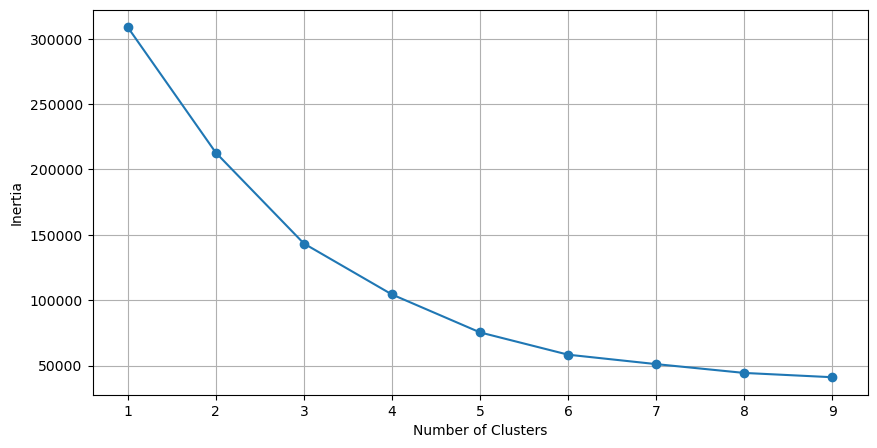

In [38]:
optimise_k_means(df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], 10)

In the plot above, we can see that the inertia (sum of squared distances to the nearest cluster center) decreases as we increase the number of outliers. We can see that there is a big change in inertia and slope from 3 clusters onwards.

# Applying K Means Clustering

In [39]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=3)